In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('../05lab/censusData-curated')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,decision
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df_only_numeric = df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis=1)

<AxesSubplot:>

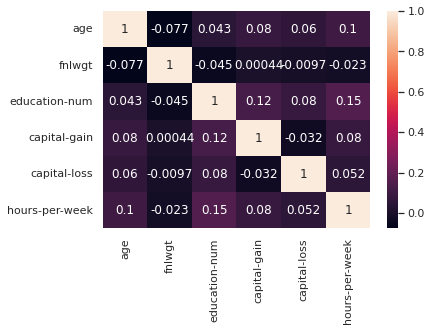

In [14]:
sns.heatmap(df_only_numeric.corr(), annot=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30159 entries, 0 to 30158
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30159 non-null  int64 
 1   workclass       30159 non-null  object
 2   fnlwgt          30159 non-null  int64 
 3   education       30159 non-null  object
 4   education-num   30159 non-null  int64 
 5   marital-status  30159 non-null  object
 6   occupation      30159 non-null  object
 7   relationship    30159 non-null  object
 8   race            30159 non-null  object
 9   sex             30159 non-null  object
 10  capital-gain    30159 non-null  int64 
 11  capital-loss    30159 non-null  int64 
 12  hours-per-week  30159 non-null  int64 
 13  native-country  30159 non-null  object
 14  decision        30159 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [17]:
non_num = df.select_dtypes(exclude=['int64'])
non_num = list(non_num.columns)
for col in non_num:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30159 entries, 0 to 30158
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30159 non-null  int64   
 1   workclass       30159 non-null  category
 2   fnlwgt          30159 non-null  int64   
 3   education       30159 non-null  category
 4   education-num   30159 non-null  int64   
 5   marital-status  30159 non-null  category
 6   occupation      30159 non-null  category
 7   relationship    30159 non-null  category
 8   race            30159 non-null  category
 9   sex             30159 non-null  category
 10  capital-gain    30159 non-null  int64   
 11  capital-loss    30159 non-null  int64   
 12  hours-per-week  30159 non-null  int64   
 13  native-country  30159 non-null  category
 14  decision        30159 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.6 MB


In [18]:
non_num.remove('decision')
df1 = pd.get_dummies(df, columns=non_num)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('decision', axis=1), df1['decision'])
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
confusion_matrix(model.predict(X_test), Y_test)

array([[5195, 1266],
       [ 493,  586]])

In [21]:
classification_report(model.predict(X_test), Y_test, output_dict=True)

{'<=50K': {'precision': 0.9133263009845288,
  'recall': 0.8040550998297478,
  'f1-score': 0.8552144209399951,
  'support': 6461},
 '>50K': {'precision': 0.31641468682505397,
  'recall': 0.5430954587581094,
  'f1-score': 0.39986352780620954,
  'support': 1079},
 'accuracy': 0.766710875331565,
 'macro avg': {'precision': 0.6148704939047914,
  'recall': 0.6735752792939286,
  'f1-score': 0.6275389743731024,
  'support': 7540},
 'weighted avg': {'precision': 0.827906190682397,
  'recall': 0.766710875331565,
  'f1-score': 0.7900521379570569,
  'support': 7540}}